# Descrição do Dataset

O dataset utilizado neste projeto foi encontrado no <a href="https://www.kaggle.com/mickey1968/individual-company-sales-data">kaggle</a>. Trata-se de dados de vendas de uma única empresa, com 40 mil instâncias e 15 features. Cada instância corresponde a informações sobre um único cliente.

<div class="alert alert-info">
  <strong><h3>Informações sobre as variáveis:</h3></strong><br>
    <li><strong>flag:</strong> (target) - o cliente comprou o produto em questão ou não? [variável binária]<br></li>
        <li><strong>gender:</strong> gênero do cliente. [variável binária]<br></li>
<li><strong>education:</strong> grau de escolaridade do cliente. [variável categórica]<br></li>
<li><strong>house_val:</strong> valor da casa que o cliente mora. [variável numérica]<br></li>
<li><strong>age:</strong> idade do cliente (faixa etária). [variável categórica]<br></li>
<li><strong>online:</strong> o cliente já fez compras online ou não? [variável binária]<br></li>
<li><strong>customer_psy:</strong> descreve a psicologia do consumidor com base na área de residência. [variável categórica]<br></li>
<li><strong>marriage:</strong> estado civil do cliente. [variável categórica]<br></li>
<li><strong>children:</strong> se o cliente tem filhos ou não. [variável binária]<br></li>
<li><strong>occupation:</strong> profissão do cliente. [variável categórica]<br></li>
<li><strong>mortgage:</strong> informações sobre empréstimos imobiliários do cliente. [variável categórica]<br></li>
<li><strong>house_own:</strong> se o cliente tem casa própria ou não. [variável binária]<br></li>
<li><strong>region:</strong> em que área o cliente está? [variável categórica]<br></li>
<li><strong>car_prob:</strong> probabilidade do cliente comprar um novo carro. [variável numérica]<br></li>
<li><strong>fam_income:</strong> renda familiar do cliente (sendo A a menor renda e L a maior). [variável categórica]</li>      
</div>

# Funções Utilizadas ao longo da análise

In [241]:
# Função para mostrar os valores únicos das colunas escolhidas

def valores_unicos(df):

    for col in df:  # Loop entre as colunas do dataset
        print(col)  # Printando o nome da coluna
        # Printando a quantidade de valores únicos
        print('A quantidade de valores únicos é: ', df[col].nunique())
        # Mostrando quais são os valores únicos
        print('Os valores únicos são: ', df[col].unique())
        print('\n')

In [242]:
# Função para mostrar a contagem dos valores de colunas específicas em ordem crescente

def contagem_valores(df):
    for col in df:
        print(col)
        print(df[col].value_counts(ascending=True))
        print('\n')

# Sumário

[1. Importação das Bibliotecas e dos Dados](#1.-Importação-das-Bibliotecas-e-dos-Dados)<br>
[2. Pré-Visualização dos Dados](#2.-Pré-Visualização-dos-Dados)<br>
[3. Pré-Processamento dos Dados](#3.-Pré-Processamento-dos-Dados)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1. Limpeza dos Dados](#3.1.-Limpeza-dos-Dados)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2. Feature Engineering](#3.2.-Feature-Engineering)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.3. Formatação dos Dados](#3.3.-Formatação-dos-Dados)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.4. Normalização dos Dados](#3.4.-Normalização-dos-Dados)<br>
[4. Análise Exploratória dos Dados](#4.-Análise-Exploratória-dos-Dados)<br>
[5. Treinamento do Modelo](#5.-Treinamento-do-Modelo)<br>
[6. Avaliação do Modelo](#6.-Avaliação-do-Modelo)<br>
[7. Exportação do Modelo](#7.-Exportação-do-Modelo)

# 1. Importação das Bibliotecas e dos Dados

In [243]:
# Importação das principais bibliotecas que serão utilizadas no projeto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-info">
  <strong><h3>Versões das Bibliotecas:</h3></strong><br>
    <li><strong>Pandas:</strong> 1.1.3<br></li>
    <li><strong>Numpy:</strong> 1.19.2<br></li>
<li><strong>Matplotlib:</strong> 3.3.2<br></li>
<li><strong>Seaborn:</strong> 0.11.0<br></li>      
</div>

In [244]:
# Importando os dados que serão utilizados

df = pd.read_csv('sales_data.csv')

# 2. Pré-Visualização dos Dados

In [245]:
# Visualizando o tamanho do dataset
df.shape

(40000, 15)

In [246]:
# Visualizando as colunas do dataset
df.columns

Index(['flag', 'gender', 'education', 'house_val', 'age', 'online',
       'customer_psy', 'marriage', 'child', 'occupation', 'mortgage',
       'house_owner', 'region', 'car_prob', 'fam_income'],
      dtype='object')

In [247]:
# Visualizando as 10 primeiras linhas
df.head(10)

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,car_prob,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,B,NaN,U,Professional,1Low,NaN,Midwest,1,L
1,N,F,3. Bach,213171,7_>65,N,E,NaN,U,Professional,1Low,Owner,Northeast,3,G
2,N,M,2. Some College,111147,2_<=25,Y,C,NaN,Y,Professional,1Low,Owner,Midwest,1,J
3,Y,M,2. Some College,354151,2_<=25,Y,B,Single,U,Sales/Service,1Low,NaN,West,2,L
4,Y,F,2. Some College,117087,1_Unk,Y,J,Married,Y,Sales/Service,1Low,NaN,South,7,H
5,Y,F,3. Bach,248694,6_<=65,Y,B,Married,N,Professional,2Med,Owner,West,1,G
6,Y,M,3. Bach,2000000,1_Unk,Y,A,Married,U,Professional,1Low,NaN,Northeast,5,C
7,N,F,3. Bach,416925,5_<=55,Y,C,Married,Y,Professional,1Low,Owner,South,2,I
8,N,F,1. HS,207676,4_<=45,Y,G,NaN,Y,Blue Collar,1Low,Renter,West,5,D
9,Y,M,1. HS,241380,1_Unk,Y,C,Married,U,Sales/Service,1Low,NaN,Northeast,6,G


In [248]:
# Análise Estatística dos dados
# Em ordem: quantidade de linhas, quantidade de valores únicos, moda, frequência da moda, média, desvio padrão,
 # valor mínimo, primeiro quartil, segundo quartil (mediana), terceiro quartil
df.describe(include='all')

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,car_prob,fam_income
count,40000,40000,39259,4.000000e+04,40000,40000,40000,25973,40000,40000,40000,36623,40000,40000.000000,40000
unique,2,3,5,NaN,7,2,11,2,4,6,3,2,5,NaN,13
top,N,M,2. Some College,NaN,5_<=55,Y,B,Married,Y,Professional,1Low,Owner,South,NaN,E
freq,20000,22019,11400,NaN,8103,27319,8197,20891,18012,14936,29848,29232,15676,NaN,8432
mean,NaN,NaN,NaN,3.072138e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.491150,NaN
std,NaN,NaN,NaN,4.222146e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.577719,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,8.065725e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,2.148720e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
75%,NaN,NaN,NaN,3.937620e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN


<div class="alert alert-warning">
Antes de começar o pré-processamento dos dados, é importante entender melhor quais dados temos em mãos. Uma forma interessante de se fazer isso é sabendo quais e quantos são os valores únicos de cada uma das variáveis.
</div>

In [249]:
# Visualizando os valores únicos do dataframe inteiro
valores_unicos(df);

flag
A quantidade de valores únicos é:  2
Os valores únicos são:  ['Y' 'N']


gender
A quantidade de valores únicos é:  3
Os valores únicos são:  ['M' 'F' 'U']


education
A quantidade de valores únicos é:  5
Os valores únicos são:  ['4. Grad' '3. Bach' '2. Some College' '1. HS' '0. <HS' nan]


house_val
A quantidade de valores únicos é:  19572
Os valores únicos são:  [756460 213171 111147 ... 120630 603554 213596]


age
A quantidade de valores únicos é:  7
Os valores únicos são:  ['1_Unk' '7_>65' '2_<=25' '6_<=65' '5_<=55' '4_<=45' '3_<=35']


online
A quantidade de valores únicos é:  2
Os valores únicos são:  ['N' 'Y']


customer_psy
A quantidade de valores únicos é:  11
Os valores únicos são:  ['B' 'E' 'C' 'J' 'A' 'G' 'F' 'I' 'D' 'H' 'U']


marriage
A quantidade de valores únicos é:  2
Os valores únicos são:  [nan 'Single' 'Married']


child
A quantidade de valores únicos é:  4
Os valores únicos são:  ['U' 'Y' 'N' '0']


occupation
A quantidade de valores únicos é:  6
Os valores úni

# 3. Pré-Processamento dos Dados

## 3.1. Limpeza dos Dados

### 3.1.1. Variáveis Desconhecidas

<div class="alert alert-danger">
Pelo código de valores únicos, é possível observar que algumas variáveis apresentam valores desconhecidos. Primeiro, é preciso verificar quantas vezes variáveis como 'U' e 'Unknown' aparecem em cada variável para depois fazer a tratativa.<br>
Pelo código, as seguintes variáveis apresentaram valores classificados como desconhecidos: gender, age, child.
</div>

In [250]:
# Criando uma variável com as colunas que possuem valores desconhecidos
features_unk = df[['gender', 'age', 'child', 'fam_income']]

In [251]:
# Visualizando informações de valores únicos em cada coluna

valores_unicos(features_unk);

gender
A quantidade de valores únicos é:  3
Os valores únicos são:  ['M' 'F' 'U']


age
A quantidade de valores únicos é:  7
Os valores únicos são:  ['1_Unk' '7_>65' '2_<=25' '6_<=65' '5_<=55' '4_<=45' '3_<=35']


child
A quantidade de valores únicos é:  4
Os valores únicos são:  ['U' 'Y' 'N' '0']


fam_income
A quantidade de valores únicos é:  13
Os valores únicos são:  ['L' 'G' 'J' 'H' 'C' 'I' 'D' 'E' 'A' 'F' 'B' 'K' 'U']




In [252]:
# Visualizando a quantidade de valores para cada coluna
contagem_valores(features_unk);

gender
U     1151
F    16830
M    22019
Name: gender, dtype: int64


age
2_<=25    2360
7_>65     4822
3_<=35    4984
6_<=65    5907
1_Unk     6709
4_<=45    7115
5_<=55    8103
Name: age, dtype: int64


child
0      127
U     8528
N    13333
Y    18012
Name: child, dtype: int64


fam_income
U     153
K    1487
J    1614
L    1617
I    1622
B    2169
A    2274
H    2498
C    2687
G    4224
D    4582
F    6641
E    8432
Name: fam_income, dtype: int64




In [253]:
print('As variáveis desconhecidas da coluna gender correspondem a {:.2%} do total de instâncias.'.format(
    1151/df.shape[0]))

As variáveis desconhecidas da coluna gender correspondem a 2.88% do total de instâncias.


In [254]:
print('As variáveis desconhecidas da coluna age correspondem a {:.2%} do total de instâncias.'.format(
    6709/df.shape[0]))

As variáveis desconhecidas da coluna age correspondem a 16.77% do total de instâncias.


In [255]:
print('As variáveis desconhecidas da coluna child correspondem a {:.2%} do total de instâncias.'.format(
    8528/df.shape[0]))

As variáveis desconhecidas da coluna child correspondem a 21.32% do total de instâncias.


In [256]:
print('As variáveis desconhecidas da coluna fam_income correspondem a {:.2%} do total de instâncias.'.format(
    153/df.shape[0]))

As variáveis desconhecidas da coluna fam_income correspondem a 0.38% do total de instâncias.


<div class="alert alert-warning">
As variáveis desconhecidas podem ser transformadas em nulas (visto que não temos essa informação de qualquer forma). Posteriormente, os dados serão tratados.
</div>

In [257]:
# Fazendo a substituição nas colunas

# Gender
df['gender'] = df.gender.replace('U', np.NaN)

# Age
df['age'] = df.age.replace('1_Unk', np.NaN)

# Child - OBS: A coluna child tem também outra variável desconhecida, o 0
df['child'] = df.child.replace('U', np.NaN)
df['child'] = df.child.replace('0', np.NaN)

# fam_income
df['fam_income'] = df.fam_income.replace('U', np.NaN)

### 3.1.2. Tratamento de Dados Nulos

<div class="alert alert-danger">
Agora que as variáveis desconhecidas já foram substituídas por valores nulos, podemos ver a quantidade de valores nulos por cada coluna.
</div>

In [258]:
# Visualizando quantos dados nulos aparecem em cada coluna (VALOR ABSOLUTO)
df.isnull().sum()

flag                0
gender           1151
education         741
house_val           0
age              6709
online              0
customer_psy        0
marriage        14027
child            8655
occupation          0
mortgage            0
house_owner      3377
region              0
car_prob            0
fam_income        153
dtype: int64

In [259]:
# Visualizando quantos dados nulos aparecem em cada coluna (VALOR RELATIVO)
df.isnull().sum() / df.shape[0] * 100

flag             0.0000
gender           2.8775
education        1.8525
house_val        0.0000
age             16.7725
online           0.0000
customer_psy     0.0000
marriage        35.0675
child           21.6375
occupation       0.0000
mortgage         0.0000
house_owner      8.4425
region           0.0000
car_prob         0.0000
fam_income       0.3825
dtype: float64

<div class="alert alert-danger">
As variáveis 'flag', 'house_val', 'online', 'customer_psy', 'occupation', 'mortgage', 'region' e 'car_prob' não apresentaram valores nulos. Todas as outras apresentaram, variando de 0.38% até 35.06%.<br>
Vamos tratar caso a caso (da menor proporção até a maior proporção). Vale lembrar que todas essas features são categóricas.
</div>

#### 3.1.2.1. Feature: 'fam_income'

In [260]:
# Visualizando os valores da coluna 'fam_income' em ordem crescente
df['fam_income'].value_counts(ascending=True, normalize=True, dropna=False)

NaN    0.003825
K      0.037175
J      0.040350
L      0.040425
I      0.040550
B      0.054225
A      0.056850
H      0.062450
C      0.067175
G      0.105600
D      0.114550
F      0.166025
E      0.210800
Name: fam_income, dtype: float64

<div class="alert alert-warning">
Como valores nulos correspondem a uma parcela muito baixa do total dos dados (0.38%) e existem muitas categorias, esses valores serão removidos.
</div>

In [261]:
# Deletando apenas os valores nulos
df.dropna(subset=['fam_income'],inplace=True)

In [262]:
# Visualizando o tamanho atual do dataset
df.shape

(39847, 15)

#### 3.1.2.2. Feature: 'education'

In [263]:
# Visualizando os valores da coluna 'education' em ordem crescente
df['education'].value_counts(ascending=True, normalize=True, dropna=False)

NaN                0.018044
0. <HS             0.096168
4. Grad            0.148142
1. HS              0.220544
3. Bach            0.231937
2. Some College    0.285166
Name: education, dtype: float64

<div class="alert alert-warning">
Os valores nulos correspondem a apenas 1.8% do total dos dados. Como uma possível substituição desses valores não causará um grande impacto nos dados como um todo, é possível fazer a substituição pela moda.
</div>

In [264]:
# Substituindo os valores nulos
df['education'] = df['education'].fillna(value='2. Some College')

#### 3.1.2.3. Feature: 'gender'

In [265]:
# Visualizando os valores da coluna 'education' em ordem crescente
df['gender'].value_counts(ascending=True, normalize=True, dropna=False)

NaN    0.028785
F      0.420508
M      0.550706
Name: gender, dtype: float64

<div class="alert alert-warning">
Os valores nulos da coluna 'gender' correspondem a apenas 2.87% do total dos dados. Há 42.05% de mulheres e 55.07% de homens, uma diferença de mais de 10% entre um gênero e outro. Sendo assim, os valores nulos podem ser substituídos pelo valor de maior frequência.
</div>

In [266]:
# Substituindo os valores nulos
df['gender'] = df['gender'].fillna(value='M')

#### 3.1.2.4. Feature: 'house_owner'

In [267]:
# Visualizando os valores da coluna 'education' em ordem crescente
df['house_owner'].value_counts(ascending=True, normalize=True, dropna=False)

NaN       0.081487
Renter    0.185309
Owner     0.733205
Name: house_owner, dtype: float64

<div class="alert alert-warning">
Os valores nulos da coluna 'gender' correspondem a 8.14% do total dos dados, um valor mais considerável em relação às outras duas features analisadas. Owner corresponde a 73.32% dos dados e Renter a 18.53%. Da mesma forma como fizemos anteriormente, podemos substituir os valores nulos pela moda.
</div>

In [268]:
# Substituindo os valores nulos
df['house_owner'] = df['house_owner'].fillna(value='Owner')

#### 3.1.2.5. Feature: 'age'

In [269]:
# Visualizando os valores da coluna 'education' em ordem crescente
df['age'].value_counts(ascending=True, normalize=True, dropna=False)

2_<=25    0.058976
7_>65     0.120360
3_<=35    0.124777
6_<=65    0.147690
NaN       0.167189
4_<=45    0.178106
5_<=55    0.202901
Name: age, dtype: float64

<div class="alert alert-warning">
Diferente das features anteriores, os valores nulos não correspondem à menor parcela dos dados. São 16.71% de dados. Substituir os valores nulos pela moda (>=55 anos), por exemplo, poderia causar uma diferença muito grande entre a primeira categoria em quantidade e a segunda (sendo que a diferença real é de apenas aproximadamente 2%). Sendo assim, as linhas nulas serão removidas.
</div>

In [270]:
# Deletando apenas os valores nulos
df.dropna(subset=['age'],inplace=True)

In [271]:
# Visualizando o tamanho atual do dataset
df.shape

(33185, 15)

#### 3.1.2.6. Feature: 'child'

In [272]:
# Visualizando os valores da coluna 'education' em ordem crescente
df['child'].value_counts(ascending=True, normalize=True, dropna=False)

NaN    0.190538
N      0.355341
Y      0.454121
Name: child, dtype: float64

<div class="alert alert-warning">
Os valores nulos da coluna 'child' correspondem a 19.05% do total dos dados. 35.53% dos clientes não possuem filhos e 45.41% possuem. Se essa parcela nula for substituída (seja pelo menor ou pelo maior), não transpareceria a realidade visto que é uma porcentagem alta. Os dados nulos serão removidos.
</div>

In [273]:
# Deletando apenas os valores nulos
df.dropna(subset=['child'],inplace=True)

In [274]:
df.shape

(26862, 15)

#### 3.1.2.7. Feature: 'marriage'

In [275]:
# Visualizando os valores da coluna 'education' em ordem crescente
df['marriage'].value_counts(ascending=True, normalize=True, dropna=False)

Single     0.093143
NaN        0.335269
Married    0.571588
Name: marriage, dtype: float64

<div class="alert alert-warning">
A feature 'marriage' é a que possui a maior quantidade de valores nulos. Mesmo após a remoção de diversas linhas anteriormente, ainda corresponde a uma parcela alta dos dados (33.52%). Como já perdemos 32.84% com as limpezas anteriores, se removêssemos mais 33.52% dos dados agora, os dados tratados ficariam muito reduzidos em relação aos originais. Sendo assim, a feature inteira será removida.
</div>

In [276]:
# Deletando a coluna 'marriage'
df = df.drop(columns=['marriage'])

### 3.1.2. Linhas duplicadas

In [277]:
# Deletando linhas duplicadas
df.drop_duplicates(inplace=True)

In [278]:
# Verificando o shape do dataset
df.shape

(26823, 14)

### 3.1.3. Tratamento de Outliers

<div class="alert alert-warning">
Temos apenas duas variáveis numéricas: house_val e car_prob.
</div>

In [279]:
# Fazendo o cálculo do IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

house_val    307969.0
car_prob          3.0
dtype: float64


In [280]:
# Somando os outliers
outlier = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outlier.sum()

age                0
car_prob         801
child              0
customer_psy       0
education          0
fam_income         0
flag               0
gender             0
house_owner        0
house_val       1599
mortgage           0
occupation         0
online             0
region             0
dtype: int64

<div class="alert alert-danger">
Pelo cálculo acima, vemos que existem 1599 outliers na coluna 'house_val' e 801 outliers na coluna 'car_prob'. Vamos visualizar esses outliers por um boxplot.</div>

#### 3.1.3.1. Feature: 'house_val'

<AxesSubplot:>

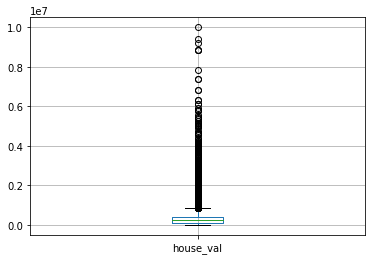

In [281]:
# Visualizando os outliers da coluna house_val
df.boxplot(column=['house_val'])

<div class="alert alert-warning">
A coluna apresenta diversos outliers, mas não necessariamente precisamos remover todos eles já que são também características do dataset. Vamos visualizar os outliers que estão mais discrepantes.
</div>

In [282]:
# Visualizando os outliers
df.loc[df['house_val'] >= 0.6e7]

,flag,gender,education,house_val,age,online,customer_psy,child,occupation,mortgage,house_owner,region,car_prob,fam_income
6046,Y,F,4. Grad,6842202,4_<=45,N,B,Y,Professional,1Low,Renter,Northeast,1,C
6379,N,M,4. Grad,7410866,5_<=55,Y,B,N,Sales/Service,1Low,Owner,West,1,L
9126,Y,M,4. Grad,7383790,3_<=35,Y,B,N,Professional,3High,Owner,Rest,8,C
9560,Y,M,3. Bach,6104000,4_<=45,Y,B,Y,Professional,1Low,Owner,Northeast,1,L
10497,Y,F,3. Bach,8875793,7_>65,Y,B,Y,Retired,1Low,Owner,South,1,A
12046,Y,M,2. Some College,7836282,4_<=45,Y,B,Y,Sales/Service,3High,Owner,South,1,K
12073,N,F,3. Bach,8848620,4_<=45,Y,B,Y,Professional,1Low,Owner,Northeast,1,C
12119,N,F,2. Some College,9413054,7_>65,Y,B,N,Retired,1Low,Owner,West,2,C
22735,Y,M,3. Bach,6303949,5_<=55,Y,B,Y,Professional,3High,Owner,South,1,L
22953,Y,M,4. Grad,6850977,5_<=55,Y,B,Y,Professional,3High,Owner,Northeast,1,L


In [283]:
# Deletando os outliers acima
df = df.loc[df['house_val'] < 0.6e7]

<AxesSubplot:>

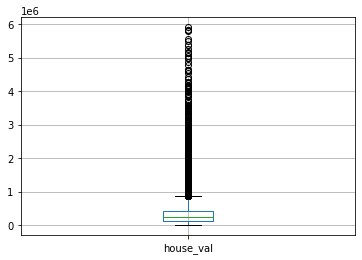

In [284]:
# Visualizando o boxplot novamente
df.boxplot(column=['house_val'])

<div class="alert alert-success">
Os outliers agora estão distribuídos de uma maneira mais uniforme.
</div>

In [285]:
# Visualizando o tamanho do dataset atual
df.shape

(26808, 14)

#### 3.1.3.1. Feature: 'car_prob'

<AxesSubplot:>

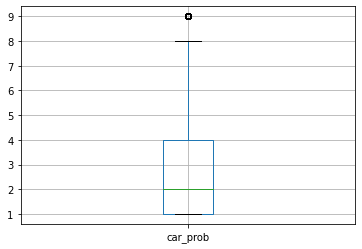

In [286]:
# Visualizando os outliers da coluna house_val
df.boxplot(column=['car_prob'])

In [287]:
# Visualizando os outliers
df.loc[df['car_prob'] == 9]

,flag,gender,education,house_val,age,online,customer_psy,child,occupation,mortgage,house_owner,region,car_prob,fam_income
56,N,F,0. <HS,0,4_<=45,N,G,Y,Sales/Service,1Low,Renter,South,9,A
147,Y,M,2. Some College,89925,5_<=55,Y,F,Y,Blue Collar,1Low,Owner,West,9,D
197,N,F,0. <HS,0,3_<=35,N,E,Y,Sales/Service,1Low,Renter,West,9,A
200,Y,M,3. Bach,0,6_<=65,N,E,Y,Professional,1Low,Renter,Midwest,9,D
375,N,M,2. Some College,0,4_<=45,N,G,Y,Blue Collar,1Low,Renter,South,9,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39830,N,M,2. Some College,27686,5_<=55,N,J,N,Blue Collar,1Low,Owner,South,9,D
39924,N,F,2. Some College,196636,3_<=35,N,C,Y,Blue Collar,1Low,Owner,Midwest,9,E
39939,N,F,2. Some College,0,2_<=25,Y,F,Y,Sales/Service,1Low,Renter,Midwest,9,C
39966,N,F,1. HS,0,5_<=55,Y,G,N,Professional,1Low,Renter,South,9,A


<div class="alert alert-warning">
Vemos acima que todas as instâncias com car_prob = 9 foram consideradas outliers. Os valores variam de 0 a 9, não faz sentido remover esses outliers.
</div>

## 3.2. Feature Engineering

In [288]:
# Visualizando as features atuais
df.columns

Index(['flag', 'gender', 'education', 'house_val', 'age', 'online',
       'customer_psy', 'child', 'occupation', 'mortgage', 'house_owner',
       'region', 'car_prob', 'fam_income'],
      dtype='object')

### 3.2.1. Variáveis Binárias

<div class="alert alert-danger">
A partir do código acima, é possível observar que as variáveis binárias estão com valores 'Y' e 'N'. Por isso, é preciso transformar 'Y' em 1 (sim) e 'N' em 0 (não), visto que o algoritmo precisa aprender a partir de números.<br>
As seguintes colunas serão ajustadas: flag, online, child.
</div>

In [289]:
# Criando variável com as features que serão transformadas
features_YN = df[['flag', 'online', 'child']]

# Loop entre as colunas da variável acima para fazer a substituição
for col in features_YN:
    df[col] = df[col].map({'Y': 1, 'N': 0})

In [290]:
# Printando o resultado 

valores_unicos(features_YN);

flag
A quantidade de valores únicos é:  2
Os valores únicos são:  ['N' 'Y']


online
A quantidade de valores únicos é:  2
Os valores únicos são:  ['Y' 'N']


child
A quantidade de valores únicos é:  2
Os valores únicos são:  ['Y' 'N']




<div class="alert alert-danger">
Além das colunas binárias de Y/N, há também outras 2 colunas binárias: gender (F/M) e house_owner (casa própria ou alugada?). Essas colunas também precisam ser ajustadas. <br>
<strong>OBS:</strong> Não necessariamente quer dizer que, na realidade, gêneros são binários. Mas, no caso do nosso problema, as únicas categorias que aparecem originalmente são F, M e U (unknown/desconhecido).
</div>

In [291]:
# Fazendo a substituição na coluna 'gender'
df['gender'] = df['gender'].map({'M': 0, 'F': 1})

In [292]:
# Fazendo a substituição na coluna 'house_owner'
df['house_owner'] = df['house_owner'].map({'Renter': 0, 'Owner': 1})

In [293]:
# Criando variável das features binárias para visualizar como os dados estão após a tratativa
features_binarias = df[['gender', 'house_owner']]

# Printando o resultado 
valores_unicos(features_binarias);

gender
A quantidade de valores únicos é:  2
Os valores únicos são:  [0 1]


house_owner
A quantidade de valores únicos é:  2
Os valores únicos são:  [1 0]




### 3.2.2. Variáveis Categóricas

<div class="alert alert-warning">
Entre as variáveis categóricas, existem tipos diferentes que exigem tratativas também diferentes. Esses dois tipos aparecem nesse dataset:<br>
    <li><strong>Variáveis Ordinais:</strong> Existe ordenação entre as categorias.</li>
    <li><strong>Variáveis Nominais:</strong> Não existe ordenação entre as categorias.</li><br>
    <strong>As ordinais são:</strong> education, age, mortgage e fam_income.<br>
    <strong>As nonimais são:</strong> customer_psy, occupation e region.<br>
</div>

#### 3.2.2.1. Variáveis Categóricas Ordinais

In [294]:
# Criando variável auxiliar apenas para conferir se a ordenação ficou correta
df_categ_ord = df[['education', 'age', 'mortgage', 'fam_income']]

In [295]:
# Verificando os valores antes do encoding
contagem_valores(df_categ_ord);

education
0. <HS             2153
4. Grad            4194
1. HS              5927
3. Bach            6683
2. Some College    7851
Name: education, dtype: int64


age
2_<=25    1864
3_<=35    3843
7_>65     4183
6_<=65    5040
4_<=45    5723
5_<=55    6155
Name: age, dtype: int64


mortgage
2Med      3406
3High     3923
1Low     19479
Name: mortgage, dtype: int64


fam_income
K    1070
J    1192
I    1201
L    1238
B    1321
A    1356
C    1541
H    1829
D    2811
G    2914
F    4730
E    5605
Name: fam_income, dtype: int64




In [296]:
# Importação da biblioteca para fazer o encoder seguindo ordenação
from sklearn.preprocessing import OrdinalEncoder

# Atribuindo a função a uma variável
enc = OrdinalEncoder()

# Substituindo os valores originais pelos valores do encoding
df[['education', 'age', 'mortgage', 'fam_income']] = enc.fit_transform(df[['education', 'age', 'mortgage', 'fam_income']])

In [297]:
# Recriando variável auxiliar para checagem da ordenação pós-encoder
df_categ_ord = df[['education', 'age', 'mortgage', 'fam_income']]

In [298]:
# Checando se os valores ficaram corretos
contagem_valores(df_categ_ord);

education
0.0    2153
4.0    4194
1.0    5927
3.0    6683
2.0    7851
Name: education, dtype: int64


age
0.0    1864
1.0    3843
5.0    4183
4.0    5040
2.0    5723
3.0    6155
Name: age, dtype: int64


mortgage
1.0     3406
2.0     3923
0.0    19479
Name: mortgage, dtype: int64


fam_income
10.0    1070
9.0     1192
8.0     1201
11.0    1238
1.0     1321
0.0     1356
2.0     1541
7.0     1829
3.0     2811
6.0     2914
5.0     4730
4.0     5605
Name: fam_income, dtype: int64




<div class="alert alert-success">
Está correto.
</div>

#### 3.2.2.2. Variáveis Categóricas Nominais

<div class="alert alert-warning">
Para as variáveis categóricas nominais, podemos utilizar o método de dummies. Cada uma das três variáveis será separada em múltiplas colunas, de acordo com a quantidade de categorias de cada.
</div>

In [299]:
# Dummies das colunas nominais
df = pd.get_dummies(df, columns = ['customer_psy', 'occupation', 'region'])

In [300]:
# Visualizando as colunas atuais
df.columns

Index(['flag', 'gender', 'education', 'house_val', 'age', 'online', 'child',
       'mortgage', 'house_owner', 'car_prob', 'fam_income', 'customer_psy_A',
       'customer_psy_B', 'customer_psy_C', 'customer_psy_D', 'customer_psy_E',
       'customer_psy_F', 'customer_psy_G', 'customer_psy_H', 'customer_psy_I',
       'customer_psy_J', 'occupation_Blue Collar', 'occupation_Farm',
       'occupation_Others', 'occupation_Professional', 'occupation_Retired',
       'occupation_Sales/Service', 'region_Midwest', 'region_Northeast',
       'region_Rest', 'region_South', 'region_West'],
      dtype='object')

## 3.3. Formatação dos Dados

In [301]:
# Verificando novamente com a função de contagem de valores
contagem_valores(df);

flag
0    12926
1    13882
Name: flag, dtype: int64


gender
1    11643
0    15165
Name: gender, dtype: int64


education
0.0    2153
4.0    4194
1.0    5927
3.0    6683
2.0    7851
Name: education, dtype: int64


house_val
383178        1
12387         1
155521        1
175740        1
1136259       1
           ... 
294300       17
2000000      20
1500000      31
1000000      53
0          4224
Name: house_val, Length: 15090, dtype: int64


age
0.0    1864
1.0    3843
5.0    4183
4.0    5040
2.0    5723
3.0    6155
Name: age, dtype: int64


online
0     7104
1    19704
Name: online, dtype: int64


child
0    11763
1    15045
Name: child, dtype: int64


mortgage
1.0     3406
2.0     3923
0.0    19479
Name: mortgage, dtype: int64


house_owner
0     3941
1    22867
Name: house_owner, dtype: int64


car_prob
9     801
7    1179
6    1324
8    1430
5    1896
4    2082
3    3902
2    5475
1    8719
Name: car_prob, dtype: int64


fam_income
10.0    1070
9.0     1192
8.0     1201
11.0    12

<div class="alert alert-warning">
Antes da etapa de Feature Engineering, é importante formatar os dados.
</div>

In [302]:
# Checando o formato das variáveis
df.dtypes

flag                          int64
gender                        int64
education                   float64
house_val                     int64
age                         float64
online                        int64
child                         int64
mortgage                    float64
house_owner                   int64
car_prob                      int64
fam_income                  float64
customer_psy_A                uint8
customer_psy_B                uint8
customer_psy_C                uint8
customer_psy_D                uint8
customer_psy_E                uint8
customer_psy_F                uint8
customer_psy_G                uint8
customer_psy_H                uint8
customer_psy_I                uint8
customer_psy_J                uint8
occupation_Blue Collar        uint8
occupation_Farm               uint8
occupation_Others             uint8
occupation_Professional       uint8
occupation_Retired            uint8
occupation_Sales/Service      uint8
region_Midwest              

<div class="alert alert-danger">
Algumas variáveis categóricas estão com o formato de float. É preciso alterar.
</div>

In [303]:
# Criando variável com as colunas que serão atualizadas
df_format = df[['flag', 'education', 'age', 'online', 'child', 'mortgage', 'fam_income']]

In [304]:
# Formatando os dados corretamente

for col in df_format:
    df[col] = df[col].astype('int64')

In [305]:
# Checando os formatos
df.dtypes

flag                        int64
gender                      int64
education                   int64
house_val                   int64
age                         int64
online                      int64
child                       int64
mortgage                    int64
house_owner                 int64
car_prob                    int64
fam_income                  int64
customer_psy_A              uint8
customer_psy_B              uint8
customer_psy_C              uint8
customer_psy_D              uint8
customer_psy_E              uint8
customer_psy_F              uint8
customer_psy_G              uint8
customer_psy_H              uint8
customer_psy_I              uint8
customer_psy_J              uint8
occupation_Blue Collar      uint8
occupation_Farm             uint8
occupation_Others           uint8
occupation_Professional     uint8
occupation_Retired          uint8
occupation_Sales/Service    uint8
region_Midwest              uint8
region_Northeast            uint8
region_Rest   

<div class="alert alert-success">
Está correto.
</div>

## 3.4. Normalização dos Dados

<div class="alert alert-warning">
No caso deste projeto, a última etapa de pré-processamento é a normalização dos dados numéricos.
</div>

In [306]:
# Importação da biblioteca para normalizar os dados (ficarão entre 0 e 1)
from sklearn.preprocessing import MinMaxScaler

# Criando um dataframe para os dados normalizados
df_norm = df.copy()

# Variável com as colunas que serão normalizadas
col_names = ['house_val', 'car_prob']

# Criando um dataframe separado apenas com as colunas que serão normalizadas
features = df[col_names]

# Usando a função de normalização
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)

# Salvando no dataframe df_norm
df_norm[col_names] = features

In [307]:
# Visualizando os dados
df_norm.head()

,flag,gender,education,house_val,age,online,child,mortgage,house_owner,car_prob,...,occupation_Farm,occupation_Others,occupation_Professional,occupation_Retired,occupation_Sales/Service,region_Midwest,region_Northeast,region_Rest,region_South,region_West
2,0,0,2,0.018819,0,1,1,0,1,0.000,...,0,0,1,0,0,1,0,0,0,0
5,1,1,3,0.042108,4,1,0,1,1,0.000,...,0,0,1,0,0,0,0,0,0,1
7,0,1,3,0.070593,3,1,1,0,1,0.125,...,0,0,1,0,0,0,0,0,1,0
8,0,1,1,0.035163,2,1,1,0,0,0.500,...,0,0,0,0,0,0,0,0,0,1
10,0,0,2,0.026797,5,1,1,1,1,0.250,...,0,0,0,0,1,1,0,0,0,0


# 4. Análise Exploratória dos Dados

# 5. Treinamento do Modelo

# 6. Avaliação do Modelo

# 7. Exportação do Modelo